# Wikipedia vs Gigaword vectors
wiki 15% = giga 100% in terms of token count, and for comparison we've got wiki 100%

In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


ids are [19, 20, 21, 22]
ids are [75, 76, 77, 78]
ids are [34, 35, 36, 37]
Calculating CI for exp 19
Calculating CI for exp 20
Calculating CI for exp 21
Calculating CI for exp 22


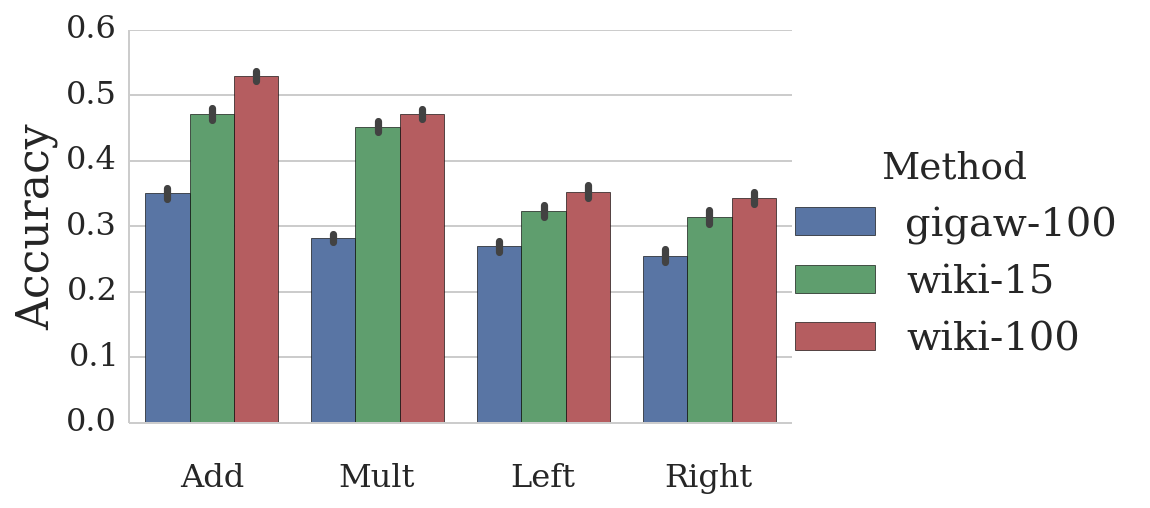

In [2]:
exp_ids, scores, folds = [], [], []

d1 = {'expansions__noise': 0.0,
      'document_features_ev': 'AN+NN', 
      'document_features_tr': 'J+N+AN+NN',
      'expansions__vectors__rep': 0, 
      'expansions__decode_handler': 'SignifiedOnlyFeatureHandler', 
      'expansions__vectors__unlabelled_percentage': 100, 
      'expansions__k': 3, 
      'expansions__vectors__unlabelled': 'gigaw', 
      'expansions__vectors__algorithm': 'word2vec',
      'expansions__allow_overlap': 0}

d2 = {'expansions__vectors__unlabelled_percentage': 15, 
     'expansions__vectors__unlabelled': 'wiki',
     'expansions__vectors__rep':0,
     'document_features_tr':'J+N+AN+NN',
     'document_features_ev':'AN+NN',
     'expansions__allow_overlap': 0}

d3 = {'expansions__noise': 0.0,
      'document_features_ev': 'AN+NN', 
      'document_features_tr': 'J+N+AN+NN',
      'expansions__vectors__rep': 0, 
      'expansions__decode_handler': 'SignifiedOnlyFeatureHandler', 
      'expansions__vectors__unlabelled_percentage': 100, 
      'expansions__k': 3, 
      'expansions__vectors__unlabelled': 'wiki', 
      'expansions__vectors__algorithm': 'word2vec',
      'labelled': 'amazon_grouped-tagged',
      'expansions__allow_overlap': 0}


id_list = []
for d in [d1, d2, d3]:
    experiments = Experiment.objects.filter(**d).\
                       exclude(expansions__vectors__composer__in=['Verb', 'CopyObj'])
    ids = [e.id for e in experiments if e.expansions.entries_of is None]
    print('ids are', ids)
    id_list.append(ids)
    
    
# ['gigaw-100', 'wiki-15', 'wiki-100']
hue_order = pretty_names([x[0] for x in id_list], 
                    name_format=['expansions__vectors__unlabelled', 
                                'expansions__vectors__unlabelled_percentage'])
# Add, Mult, ..
composers = pretty_names(id_list[0], 
                    name_format=['expansions__vectors__composer'])
diff_plot_bar(id_list, hue_order, composers, hue_order=hue_order)
plt.savefig('plot-wiki-vs-gigaw.pdf', format='pdf', dpi=300)